In [1]:
# This is the import cell
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)

In [2]:
# Get the current path
if first:
    parent = os.getcwd()
os.chdir(parent)

# Grab file names from data folder
data = os.listdir('data')
data.remove('.DS_Store')
print(data)

['area_pe250_ep51_phi50.txt', 'area_pe250_ep1_phi60.txt', 'area_pe300_ep1_phi60.txt', 'area_pe450_ep85_phi50.txt', 'area_pe350_ep68_phi50.txt', 'area_pe300_ep60_phi50.txt', 'area_pe500_ep93_phi50.txt', 'area_pe100_ep1_phi45.txt', 'area_pe50_ep1_phi50.txt', 'area_pe50_ep1_phi45.txt', 'area_pe100_ep1_phi50.txt', 'area_pe200_ep43_phi60.txt', 'area_pe400_ep1_phi60.txt', 'area_pe100_ep26_phi50.txt', 'area_pe150_ep1_phi45.txt', 'area_pe50_ep18_phi60.txt', 'area_pe450_ep1_phi60.txt', 'area_pe500_ep1_phi60.txt', 'area_pe150_ep1_phi50.txt', 'area_pe150_ep35_phi60.txt', 'area_pe400_ep76_phi50.txt', 'area_pe350_ep1_phi60.txt', 'area_pe200_ep1_phi60.txt', 'area_pe400_ep76_phi60.txt', 'area_pe200_ep1_phi50.txt', 'area_pe350_ep1_phi50.txt', 'area_pe350_ep1_phi45.txt', 'area_pe200_ep1_phi45.txt', 'area_pe150_ep35_phi50.txt', 'area_pe450_ep1_phi45.txt', 'area_pe500_ep1_phi45.txt', 'area_pe50_ep18_phi50.txt', 'area_pe500_ep1_phi50.txt', 'area_pe450_ep1_phi50.txt', 'area_pe150_ep1_phi60.txt', 'area_pe10

In [3]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, ref):
    boolean = False
    for i in xrange(len(fname)):
        if fname[i] == ref[0]:
            for j in xrange(1, len(ref)):
                if fname[i + j] == ref[j]:
                    boolean = True
                    break
    return boolean

def txtValue(fname, string):
    out = ""
    index = 0
    for i in xrange(len(fname)):
        if fname[i] == string[0]:
            for j in xrange(1, len(string)):
                if fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        index = i + j
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    ind = np.arange(0, len(arr1))
    for i in xrange(len(cpy1)):
        for j in xrange(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]      
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [4]:
# Grab parameters, sort them
peList = []
paList = []
pbList = []
xaList = []
epList = []
phiList = []
for i in xrange(len(data)):
    if checkFile(data[i], "pe"):
        peList.append(txtValue(data[i], "pe"))
    else:
        peList.append(0)
    
    if checkFile(data[i], "pa"):
        paList.append(txtValue(data[i], "pa"))
    else:
        paList.append(0)
        
    if checkFile(data[i], "pb"):
        pbList.append(txtValue(data[i], "pb"))
    else:
        pbList.append(0)
        
    if checkFile(data[i], "xa"):
        xaList.append(txtValue(data[i], "xa"))
    else:
        xaList.append(100.)
        
    if checkFile(data[i], "ep"):
        epList.append(txtValue(data[i], "ep"))
    else:
        epList.append(1.)
        
    if checkFile(data[i], "phi"):
        phiList.append(txtValue(data[i], "phi"))
    else:
        phiList.append(60.)

# Take a look at your lists
# print(peList)
# print(paList) 
# print(pbList) 
# print(xaList) 
# print(epList) 
# print(phiList)        

# Sort the arrays
if len(paList) > 1:
    # Sort them!
    print("Sorting... ")
    indArr = multiSort(peList, epList, phiList)
#     indArr = multiSort(paList, epList, phiList)
    indSort(data, indArr)
    indSort(peList, indArr)
    indSort(paList, indArr)
    indSort(pbList, indArr)
    indSort(xaList, indArr)
    indSort(epList, indArr)
    indSort(phiList, indArr)

# Print the sorted array
print("Sorted textfiles:")
for i in data:
    print(i)
    
# Now that the data is sorted, read it into a dataframe
all_data = []
os.chdir('data')
for i in xrange(len(data)):
    df = pd.read_csv(data[i], sep='\s+', header=0)
    all_data.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_data[0])
# print(all_data[0]['Timestep'])
# print(all_data[0]['Timestep'][0])

Sorting... 
Sorted textfiles:
area_pe50_ep1_phi45.txt
area_pe50_ep1_phi50.txt
area_pe50_ep1_phi60.txt
area_pe50_ep18_phi50.txt
area_pe50_ep18_phi60.txt
area_pe100_ep1_phi45.txt
area_pe100_ep1_phi50.txt
area_pe100_ep1_phi60.txt
area_pe100_ep26_phi50.txt
area_pe100_ep26_phi60.txt
area_pe150_ep1_phi45.txt
area_pe150_ep1_phi50.txt
area_pe150_ep1_phi60.txt
area_pe150_ep35_phi50.txt
area_pe150_ep35_phi60.txt
area_pe200_ep1_phi45.txt
area_pe200_ep1_phi50.txt
area_pe200_ep1_phi60.txt
area_pe200_ep43_phi50.txt
area_pe200_ep43_phi60.txt
area_pe250_ep1_phi45.txt
area_pe250_ep1_phi50.txt
area_pe250_ep1_phi60.txt
area_pe250_ep51_phi50.txt
area_pe250_ep51_phi60.txt
area_pe300_ep1_phi45.txt
area_pe300_ep1_phi50.txt
area_pe300_ep1_phi60.txt
area_pe300_ep60_phi50.txt
area_pe300_ep60_phi60.txt
area_pe350_ep1_phi45.txt
area_pe350_ep1_phi50.txt
area_pe350_ep1_phi60.txt
area_pe350_ep68_phi50.txt
area_pe350_ep68_phi60.txt
area_pe400_ep1_phi45.txt
area_pe400_ep1_phi50.txt
area_pe400_ep1_phi60.txt
area_pe400_

,Timestep,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,MCS,sigALL,sigAA,sigAB,sigBB,phiEff,Lc_area_A,Lc_area_B,lc_area,den_area_A,den_area_B,den_area,Box_area
0,0.0,50000,0,50000,0,0,0,7,0,7,0,1.1152,1.1152,0.0,0.0,0.45,5.3340,0.0,5.3340,0.0000,0.0,0.0000,87266.46
1,50000.0,50000,0,50000,0,0,0,53,0,53,0,1.0180,1.0180,0.0,0.0,0.43,37.5267,0.0,37.5267,0.0000,0.0,0.0000,87266.46
2,100000.0,50000,0,50000,0,0,0,75,0,75,0,0.9820,0.9820,0.0,0.0,0.43,53.5578,0.0,53.5578,0.0000,0.0,0.0000,87266.46
3,150000.0,50000,0,50000,0,0,0,65,0,65,0,0.9983,0.9983,0.0,0.0,0.43,46.5453,0.0,46.5453,0.0000,0.0,0.0000,87266.46
4,200000.0,49890,0,49890,110,0,110,110,0,110,110,0.9868,0.9868,0.0,0.0,0.43,78.1870,0.0,78.1870,78.1870,0.0,78.1870,87266.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,49750000.0,48219,0,48219,1781,0,1781,281,0,281,161,0.9891,0.9891,0.0,0.0,0.42,196.0779,0.0,196.0779,1239.6429,0.0,1239.6429,87266.46
996,49800000.0,47902,0,47902,2098,0,2098,239,0,239,149,0.9859,0.9859,0.0,0.0,0.42,164.7755,0.0,164.7755,1460.5848,0.0,1460.5848,87266.46
997,49850000.0,48201,0,48201,1799,0,1799,249,0,249,163,0.9831,0.9831,0.0,0.0,0.42,172.6939,0.0,172.6939,1245.8786,0.0,1245.8786,87266.46
998,49900000.0,47227,0,47227,2773,0,2773,312,0,312,154,0.9851,0.9851,0.0,0.0,0.42,216.0777,0.0,216.0777,1929.4349,0.0,1929.4349,87266.46


In [5]:
# Function to get conversion from timesteps to Brownian time
def computeTauPerTstep(epsilon, mindt=0.00001):
    kBT = 1.0
    tstepPerTau = int(epsilon / (kBT * mindt))
    return 1. / tstepPerTau

# Grab the parameters from each file, store in a dataframe
headers = ['partAll', 'partA', 'partB', 'pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params = pd.DataFrame(columns=headers)
for i in xrange(len(all_data)):
    partAll = all_data[i]['Gas_tot'][0] + all_data[i]['Dense_tot'][0]
    partA = all_data[i]['Gas_A'][0] + all_data[i]['Dense_A'][0]
    partB = all_data[i]['Gas_B'][0] + all_data[i]['Dense_B'][0]
    pe = int(peList[i])
    pa = int(paList[i])
    pb = int(pbList[i])
    xa = float(xaList[i])
    ep = int(epList[i])
    phi = float(phiList[i])
    if ep == 1:
        tauPerdt = computeTauPerTstep(ep, 0.000001)
    else:
        tauPerdt = computeTauPerTstep(ep)
    df = pd.DataFrame([[partAll, partA, partB, pe, pa, pb, xa, ep, phi, tauPerdt]], columns=headers)
    params = params.append(df, ignore_index = True)
display(params)

,partAll,partA,partB,pe,peA,peB,xA,eps,phi,tauPer_dt
0,50000,50000,0,50,0,0,100.0,1,45.0,1.000000e-06
1,50000,50000,0,50,0,0,100.0,1,50.0,1.000000e-06
2,50000,50000,0,50,0,0,100.0,1,60.0,1.000000e-06
3,50000,50000,0,50,0,0,100.0,18,50.0,5.555559e-07
4,50000,50000,0,50,0,0,100.0,18,60.0,5.555559e-07
...,...,...,...,...,...,...,...,...,...,...
45,50000,50000,0,500,0,0,100.0,1,45.0,1.000000e-06
46,50000,50000,0,500,0,0,100.0,1,50.0,1.000000e-06
47,50000,50000,0,500,0,0,100.0,1,60.0,1.000000e-06
48,50000,50000,0,500,0,0,100.0,93,50.0,1.075269e-07


In [6]:
# Let's add columns to the time-resolved simulation data
for i in xrange(len(all_data)):
    # Move timestep column from timesteps to rotational relaxation time
    all_data[i]['Timestep'] *= params['tauPer_dt'][i] * 3.0
    
    # New column for number of clusters
    all_data[i]['nClust'] = all_data[i]['Dense_tot'] / all_data[i]['MCS']
    
    # New column for area of gas phase
    all_data[i]['a_gas'] = all_data[i]['Box_area'] - all_data[i]['den_area']
    
    # New columns for area fractions:
    all_data[i]['phiLC_A'] = all_data[i]['Lc_area_A'] / all_data[i]['Box_area']
    all_data[i]['phiLC_B'] = all_data[i]['Lc_area_B'] / all_data[i]['Box_area']
    all_data[i]['phiLC'] = all_data[i]['lc_area'] / all_data[i]['Box_area']
    all_data[i]['phiC_A'] = all_data[i]['den_area_A'] / all_data[i]['Box_area']
    all_data[i]['phiC_B'] = all_data[i]['den_area_B'] / all_data[i]['Box_area']
    all_data[i]['phiC'] = all_data[i]['den_area'] / all_data[i]['Box_area']
    all_data[i]['phiG_A'] = (all_data[i]['Gas_A'] * np.pi * 0.25) / all_data[i]['Box_area']
    all_data[i]['phiG_B'] = (all_data[i]['Gas_B'] * np.pi * 0.25) / all_data[i]['Box_area']
    all_data[i]['phiG'] = (all_data[i]['Gas_tot'] * np.pi * 0.25) / all_data[i]['Box_area']
    
    # New columns for number densities:
    all_data[i]['rhoLC_A'] = all_data[i]['Lc_numA'] / all_data[i]['lc_area']
    all_data[i]['rhoLC_B'] = all_data[i]['Lc_numB'] / all_data[i]['lc_area']
    all_data[i]['rhoLC'] = all_data[i]['Lg_clust'] / all_data[i]['lc_area']
    all_data[i]['rhoC_A'] = all_data[i]['Dense_A'] / all_data[i]['den_area']
    all_data[i]['rhoC_B'] = all_data[i]['Dense_B'] / all_data[i]['den_area']
    all_data[i]['rhoC'] = all_data[i]['Dense_tot'] / all_data[i]['den_area']
    all_data[i]['rhoG_A'] = all_data[i]['Gas_A'] / all_data[i]['a_gas']
    all_data[i]['rhoG_B'] = all_data[i]['Gas_B'] / all_data[i]['a_gas']
    all_data[i]['rhoG'] = all_data[i]['Gas_tot'] / all_data[i]['a_gas']
    
    # Ger rid of NaN in favor of 0
    all_data[i].fillna(0, inplace=True)

# display(all_data[0][0])
display(all_data[0])

,Timestep,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,MCS,sigALL,sigAA,sigAB,sigBB,phiEff,Lc_area_A,Lc_area_B,lc_area,den_area_A,den_area_B,den_area,Box_area,nClust,a_gas,phiLC_A,phiLC_B,phiLC,phiC_A,phiC_B,phiC,phiG_A,phiG_B,phiG,rhoLC_A,rhoLC_B,rhoLC,rhoC_A,rhoC_B,rhoC,rhoG_A,rhoG_B,rhoG
0,0.00,50000,0,50000,0,0,0,7,0,7,0,1.1152,1.1152,0.0,0.0,0.45,5.3340,0.0,5.3340,0.0000,0.0,0.0000,87266.46,0.000000,87266.4600,0.000061,0.0,0.000061,0.000000,0.0,0.000000,0.450000,0.0,0.450000,1.312336,0.0,1.312336,0.000000,0.0,0.000000,0.572958,0.0,0.572958
1,0.15,50000,0,50000,0,0,0,53,0,53,0,1.0180,1.0180,0.0,0.0,0.43,37.5267,0.0,37.5267,0.0000,0.0,0.0000,87266.46,0.000000,87266.4600,0.000430,0.0,0.000430,0.000000,0.0,0.000000,0.450000,0.0,0.450000,1.412328,0.0,1.412328,0.000000,0.0,0.000000,0.572958,0.0,0.572958
2,0.30,50000,0,50000,0,0,0,75,0,75,0,0.9820,0.9820,0.0,0.0,0.43,53.5578,0.0,53.5578,0.0000,0.0,0.0000,87266.46,0.000000,87266.4600,0.000614,0.0,0.000614,0.000000,0.0,0.000000,0.450000,0.0,0.450000,1.400356,0.0,1.400356,0.000000,0.0,0.000000,0.572958,0.0,0.572958
3,0.45,50000,0,50000,0,0,0,65,0,65,0,0.9983,0.9983,0.0,0.0,0.43,46.5453,0.0,46.5453,0.0000,0.0,0.0000,87266.46,0.000000,87266.4600,0.000533,0.0,0.000533,0.000000,0.0,0.000000,0.450000,0.0,0.450000,1.396489,0.0,1.396489,0.000000,0.0,0.000000,0.572958,0.0,0.572958
4,0.60,49890,0,49890,110,0,110,110,0,110,110,0.9868,0.9868,0.0,0.0,0.43,78.1870,0.0,78.1870,78.1870,0.0,78.1870,87266.46,1.000000,87188.2730,0.000896,0.0,0.000896,0.000896,0.0,0.000896,0.449010,0.0,0.449010,1.406883,0.0,1.406883,1.406883,0.0,1.406883,0.572210,0.0,0.572210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,149.25,48219,0,48219,1781,0,1781,281,0,281,161,0.9891,0.9891,0.0,0.0,0.42,196.0779,0.0,196.0779,1239.6429,0.0,1239.6429,87266.46,11.062112,86026.8171,0.002247,0.0,0.002247,0.014205,0.0,0.014205,0.433971,0.0,0.433971,1.433104,0.0,1.433104,1.436704,0.0,1.436704,0.560511,0.0,0.560511
996,149.40,47902,0,47902,2098,0,2098,239,0,239,149,0.9859,0.9859,0.0,0.0,0.42,164.7755,0.0,164.7755,1460.5848,0.0,1460.5848,87266.46,14.080537,85805.8752,0.001888,0.0,0.001888,0.016737,0.0,0.016737,0.431118,0.0,0.431118,1.450458,0.0,1.450458,1.436411,0.0,1.436411,0.558260,0.0,0.558260
997,149.55,48201,0,48201,1799,0,1799,249,0,249,163,0.9831,0.9831,0.0,0.0,0.42,172.6939,0.0,172.6939,1245.8786,0.0,1245.8786,87266.46,11.036810,86020.5814,0.001979,0.0,0.001979,0.014277,0.0,0.014277,0.433809,0.0,0.433809,1.441858,0.0,1.441858,1.443961,0.0,1.443961,0.560343,0.0,0.560343
998,149.70,47227,0,47227,2773,0,2773,312,0,312,154,0.9851,0.9851,0.0,0.0,0.42,216.0777,0.0,216.0777,1929.4349,0.0,1929.4349,87266.46,18.006494,85337.0251,0.002476,0.0,0.002476,0.022110,0.0,0.022110,0.425043,0.0,0.425043,1.443925,0.0,1.443925,1.437208,0.0,1.437208,0.553417,0.0,0.553417


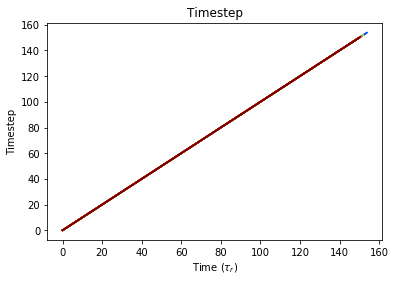

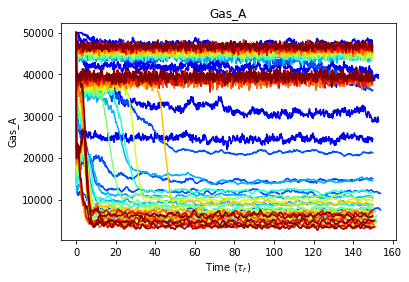

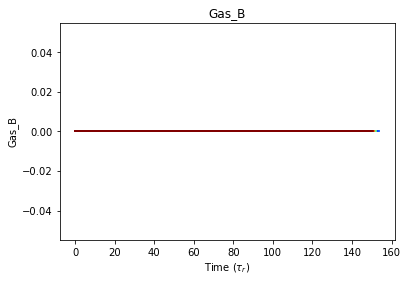

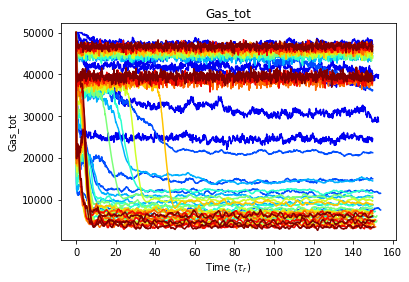

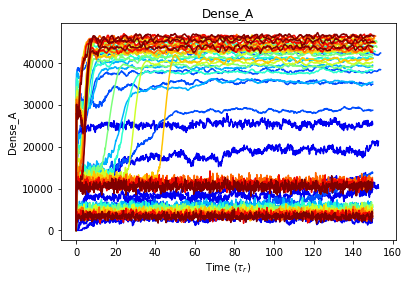

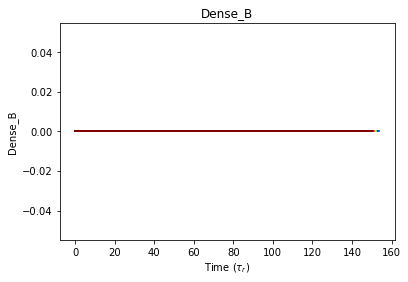

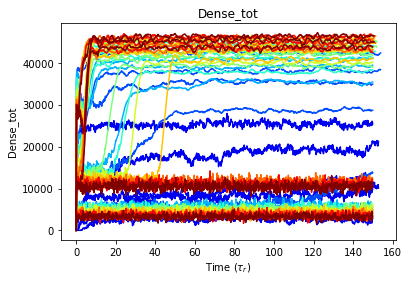

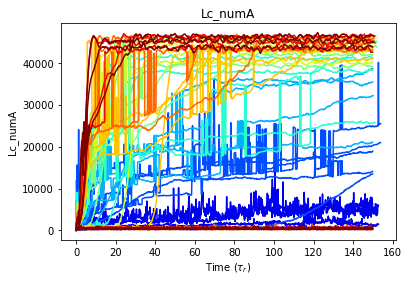

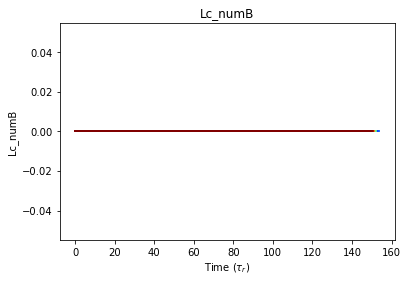

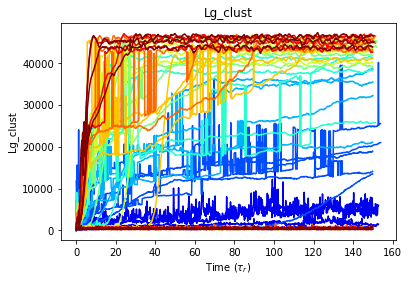

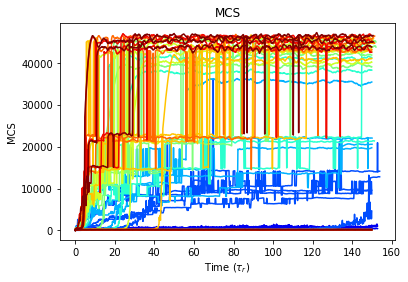

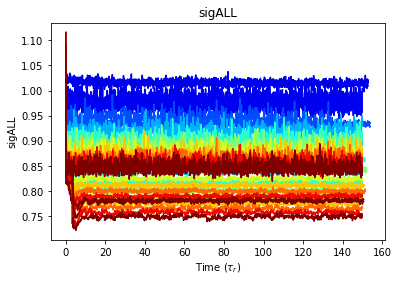

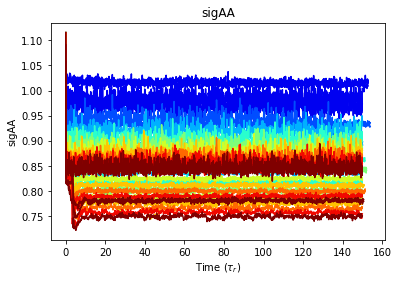

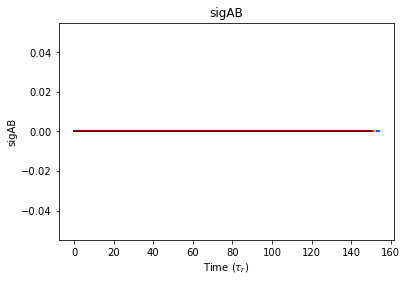

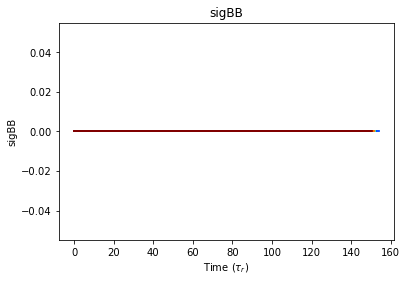

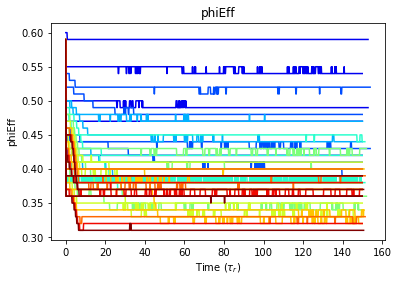

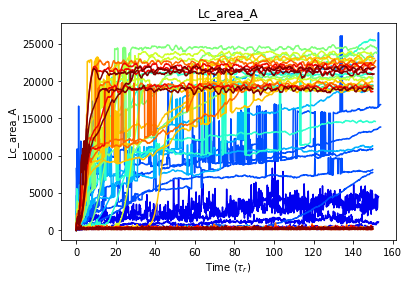

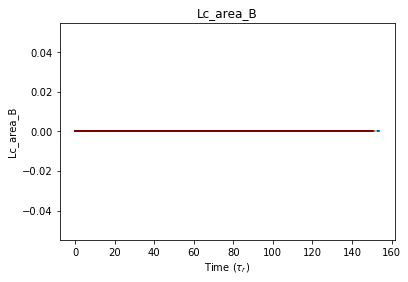

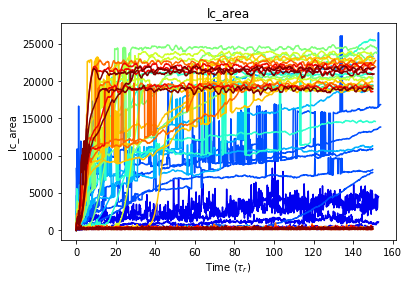

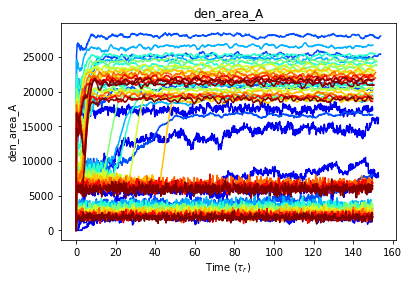

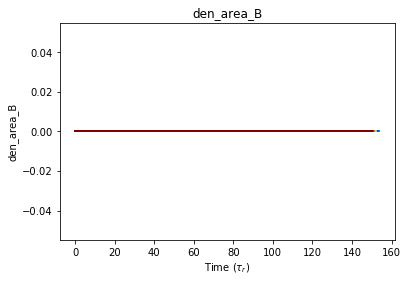

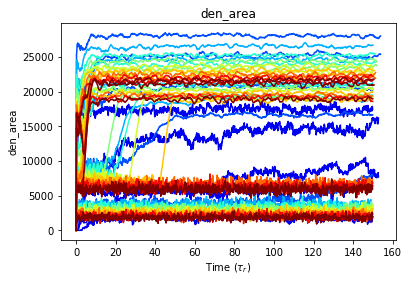

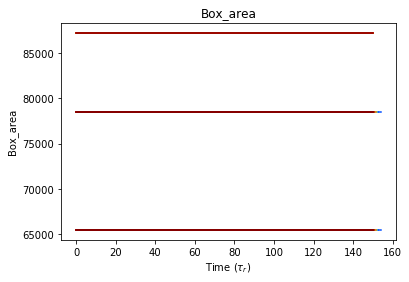

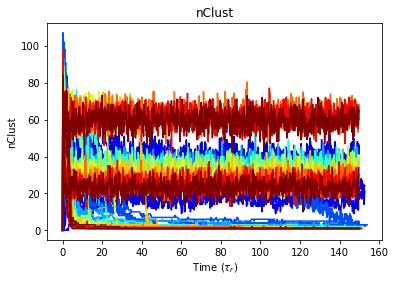

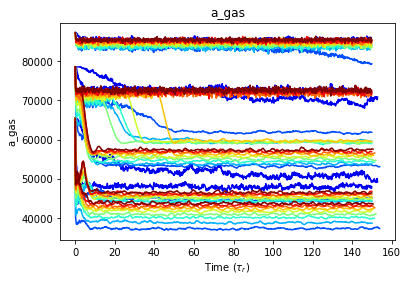

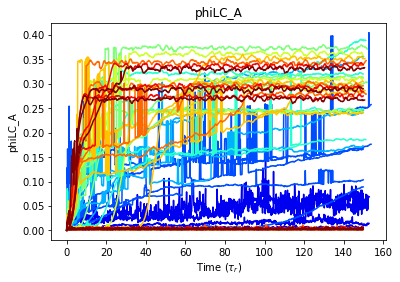

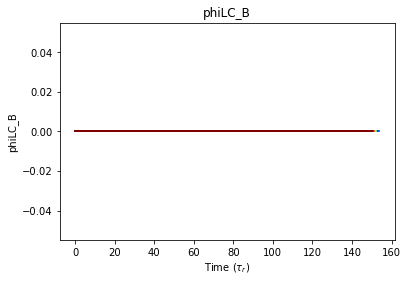

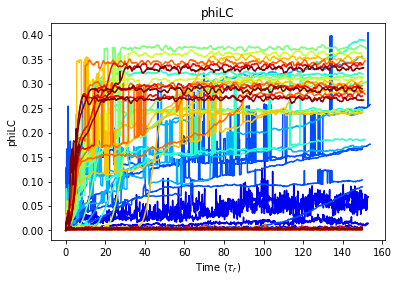

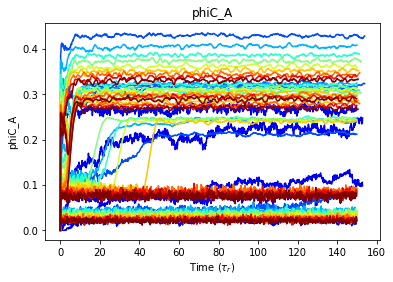

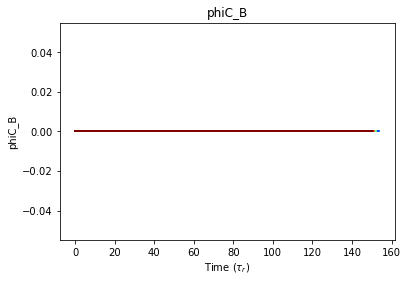

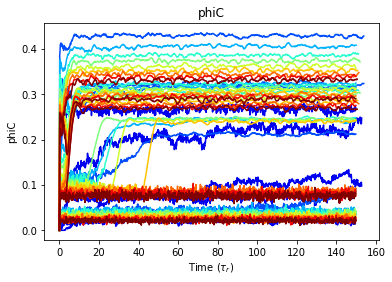

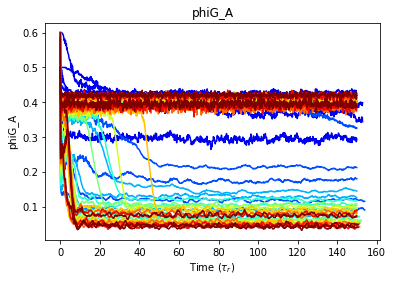

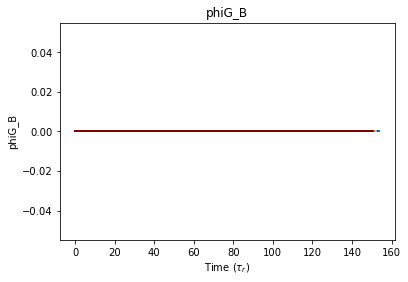

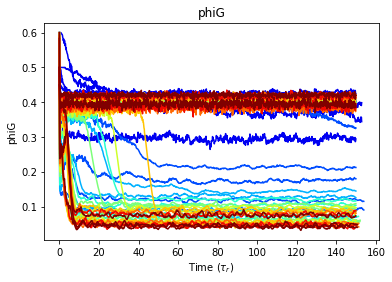

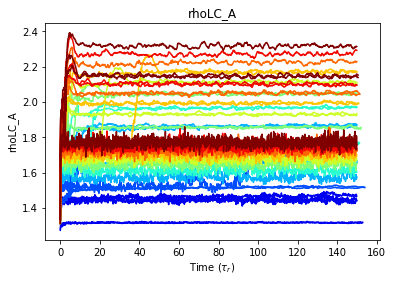

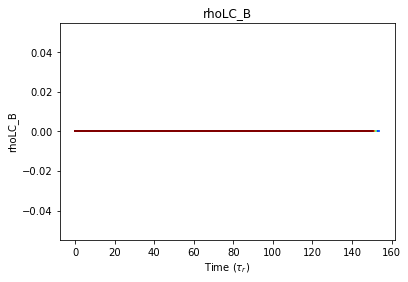

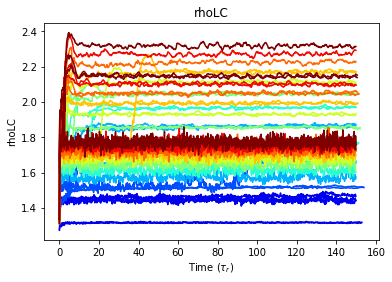

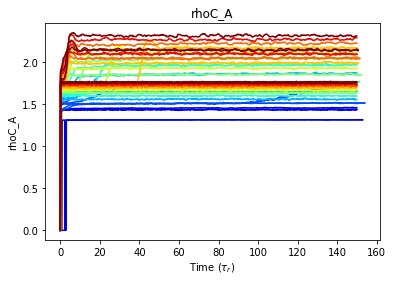

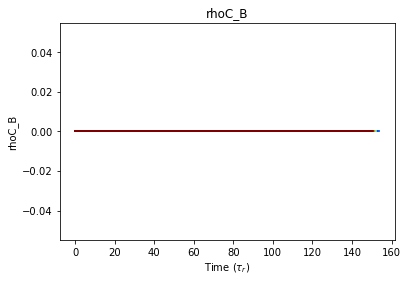

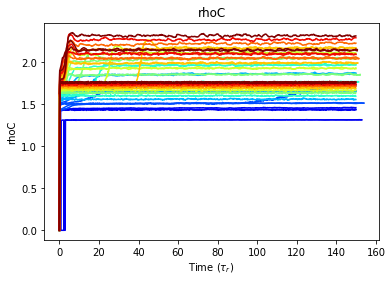

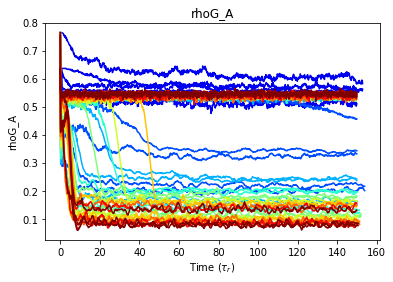

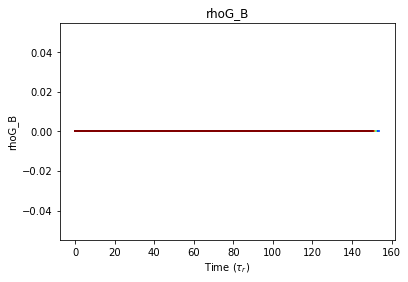

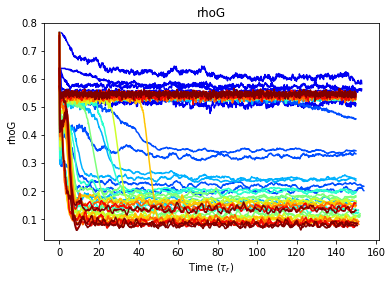

In [7]:
# %%capture
# Plot each column vs time for all files
for z in list(all_data[0]):
    for i in xrange(len(all_data)):
        plt.plot(all_data[i]['Timestep'], all_data[i][z], c=plt.cm.jet(params['pe'][i] / 500.), label=(params['pe'][i]))
    plt.xlabel(r'Time $(\tau_{r})$')
    plt.ylabel(z)
    plt.title(z)
#     plt.legend()
    plt.show()

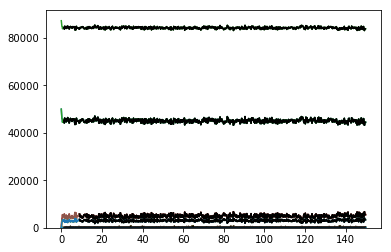

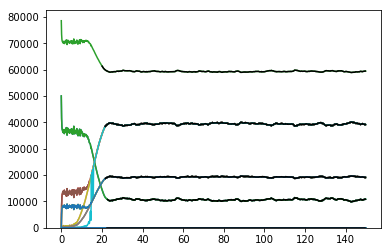

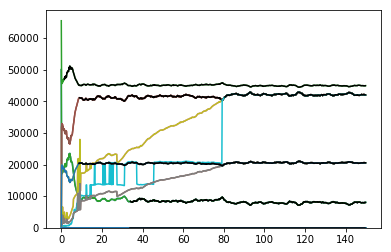

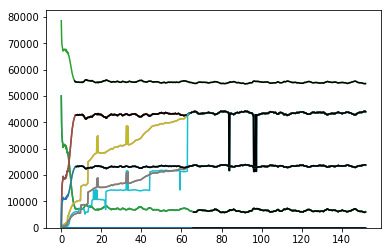

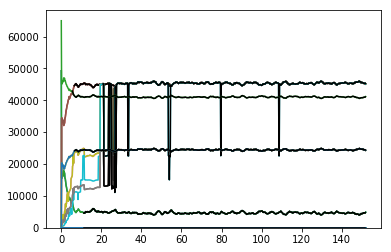

,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,MCS,sigALL,sigAA,sigAB,sigBB,phiEff,Lc_area_A,Lc_area_B,lc_area,den_area_A,den_area_B,den_area,nClust,a_gas,phiLC_A,phiLC_B,phiLC,phiC_A,phiC_B,phiC,phiG_A,phiG_B,phiG,rhoLC_A,rhoLC_B,rhoLC,rhoC_A,rhoC_B,rhoC,rhoG_A,rhoG_B,rhoG
0,0.948819,0.0,0.948819,0.0514291,0.0,0.0514291,0.00637629,0.0,0.00637629,0.0031423,0.983758,0.983758,0.0,0.0,0.420000,220.901409,0.0,220.901409,1790.820093,0.0,1790.820093,0.000328515,85484.213438,0.002531,0.0,0.002531,0.020521,0.0,0.020521,0.426968,0.0,0.426968,1.442197,0.0,1.442197,1.435769,0.0,1.435769,0.554951,0.0,0.554951
1,0.833124,0.0,0.833124,0.167756,0.0,0.167756,0.0132831,0.0,0.0132831,0.00426552,0.979734,0.979734,0.0,0.0,0.470000,457.678421,0.0,457.678421,5823.332713,0.0,5823.332713,0.000800422,72764.539045,0.005827,0.0,0.005827,0.074145,0.0,0.074145,0.416562,0.0,0.416562,1.450202,0.0,1.450202,1.440043,0.0,1.440043,0.572643,0.0,0.572643
2,0.493607,0.0,0.493607,0.506393,0.0,0.506393,0.0987539,0.0,0.0987539,0.0134197,0.967461,0.967461,0.0,0.0,0.544818,3363.606910,0.0,3363.606910,17385.649375,0.0,17385.649375,0.000769062,48076.090479,0.051392,0.0,0.051392,0.265633,0.0,0.265633,0.296164,0.0,0.296164,1.464008,0.0,1.464008,1.455886,0.0,1.455886,0.513519,0.0,0.513519
3,0.794217,0.0,0.794217,0.221555,0.0,0.221555,0.0307712,0.0,0.0307712,0.0102369,1.017805,1.017805,0.0,0.0,0.492220,1168.471910,0.0,1168.471910,8421.838497,0.0,8421.838497,0.000410766,71130.436506,0.014877,0.0,0.014877,0.107230,0.0,0.107230,0.397108,0.0,0.397108,1.316388,0.0,1.316388,1.314831,0.0,1.314831,0.564599,0.0,0.564599
4,0.613801,0.0,0.613801,0.386922,0.0,0.386922,0.100357,0.0,0.100357,0.0178779,1.013547,1.013547,0.0,0.0,0.590000,3809.383539,0.0,3809.383539,14701.010618,0.0,14701.010618,0.000521829,51274.133125,0.058203,0.0,0.058203,0.224615,0.0,0.224615,0.368280,0.0,0.368280,1.316987,0.0,1.316987,1.315465,0.0,1.315465,0.609873,0.0,0.609873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.934411,0.0,0.934411,0.0655823,0.0,0.0655823,0.00526954,0.0,0.00526954,0.00281306,0.847842,0.847842,0.0,0.0,0.360000,149.234942,0.0,149.234942,1866.277901,0.0,1866.277901,0.0004671,85399.975944,0.001710,0.0,0.001710,0.021386,0.0,0.021386,0.420485,0.0,0.420485,1.765340,0.0,1.765340,1.756982,0.0,1.756982,0.547063,0.0,0.547063
46,0.790155,0.0,0.790155,0.209832,0.0,0.209832,0.0106731,0.0,0.0106731,0.00354275,0.846051,0.846051,0.0,0.0,0.390000,300.359902,0.0,300.359902,5944.362560,0.0,5944.362560,0.00118776,72595.093524,0.003824,0.0,0.003824,0.075686,0.0,0.075686,0.395078,0.0,0.395078,1.776506,0.0,1.776506,1.764980,0.0,1.764980,0.544178,0.0,0.544178
47,0.125807,0.0,0.125807,0.873513,0.0,0.873513,0.87418,0.0,0.87418,0.874205,0.749160,0.749160,0.0,0.0,0.360000,18859.223432,0.0,18859.223432,18844.895599,0.0,18844.895599,2e-05,46610.365446,0.288148,0.0,0.288148,0.287929,0.0,0.287929,0.075484,0.0,0.075484,2.319570,0.0,2.319570,2.318293,0.0,2.318293,0.134973,0.0,0.134973
48,0.0929592,0.0,0.0929592,0.907085,0.0,0.907085,0.907071,0.0,0.907071,0.906138,0.781299,0.781299,0.0,0.0,0.310042,21130.746628,0.0,21130.746628,21131.086165,0.0,21131.086165,2.00417e-05,57413.382921,0.269045,0.0,0.269045,0.269049,0.0,0.269049,0.046480,0.0,0.046480,2.149526,0.0,2.149526,2.148922,0.0,2.148922,0.080935,0.0,0.080935


In [8]:
# Let's compute a moving average of the data
winSz = 10
perc = 0.05
ssIndex = [[] for x in all_data]
headers = list(all_data[0])
headers.remove('Timestep')
headers.remove('Box_area')
ssAvg = pd.DataFrame(columns=headers)

# Get the index at which each data set is at steady-state
for i in xrange(len(all_data)):
    # List to store the steady-state column averages
    ssMean = []
    
    for j in headers:
        # Get the final window average
        match = np.mean(all_data[i][j][-winSz:-1])
        # Compute the moving average for the column
        movAvg = all_data[i][j].rolling(window=winSz).mean()
        # Threshold number of indices which must be in agreement
        thresh = 0
        count = 0
        
        # Get the index that steady-state begins
        for k in xrange(len(movAvg)):
            # If the moving average is within 5% of the final average...
            if ((1. - perc) * match) <= movAvg[k] <= ((1. + perc) * match):
                count += 1
                if count > thresh:
                    # Store the index
                    ssIndex[i].append(k)
                    # Compute the steady-state average
                    ssMean.append(np.mean(all_data[i][j][k:-1]))
                    break
            # Not within margin, reset the consecutive count
            else:
                count = 0
                
    # Append list of steady-state averages to dataframe
    ss_df = pd.DataFrame([ssMean], columns=headers)
    ssAvg = ssAvg.append(ss_df, ignore_index=True)

# Normalize by number of particles 
ssAvg['Gas_tot'] /= params['partAll']
ssAvg['Dense_tot'] /= params['partAll']
ssAvg['Lg_clust'] /= params['partAll']
ssAvg['MCS'] /= params['partAll']
ssAvg['nClust'] /= params['partAll']

# For type-A particles
ssAvg['Gas_A'] /= params['partA']
ssAvg['Dense_A'] /= params['partA']
ssAvg['Lc_numA'] /= params['partA']

# For type-B particles
if np.any(params['partB']):
    ssAvg['Gas_B'] /= params['partB']
    ssAvg['Dense_B'] /= params['partB']
    ssAvg['Lc_numB'] /= params['partB']

# Now let's check and see how we did with our averaging
for i in xrange(len(all_data)):
    # This is just to limit the output
    if params['pe'][i] == 250:
        count = 0
        for j in headers:
            # Plot the raw data
            plt.plot(all_data[i]['Timestep'], all_data[i][j])
            # Overlay the range we compute the steady-state average
            plt.plot(all_data[i]['Timestep'][ssIndex[i][count]:-1], all_data[i][j][ssIndex[i][count]:-1], c='k')
            count += 1
        plt.ylim(0)
        plt.show()
        
# print(ssIndex)
# print(ssMean)
display(ssAvg)

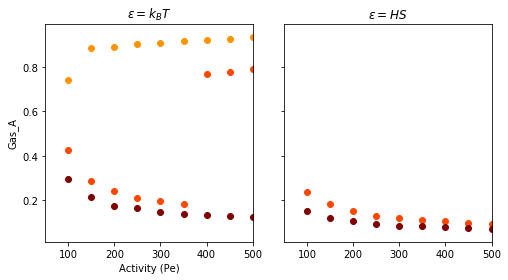

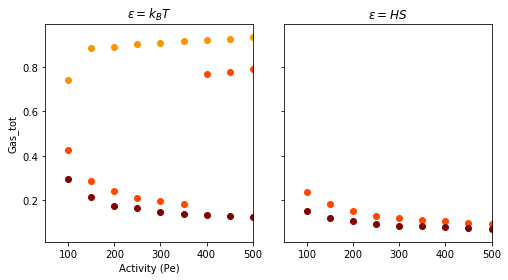

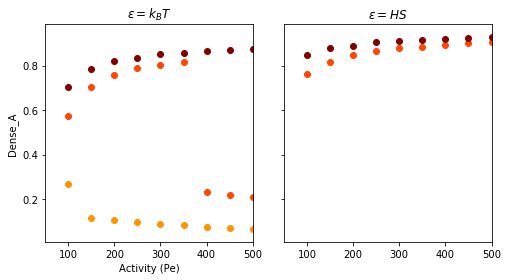

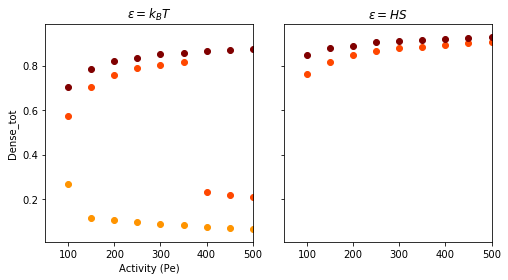

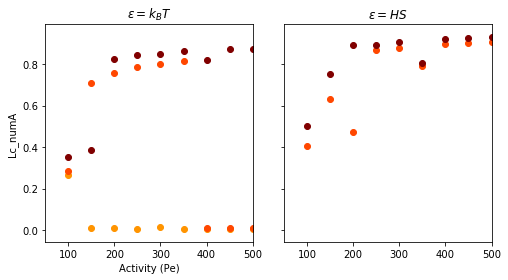

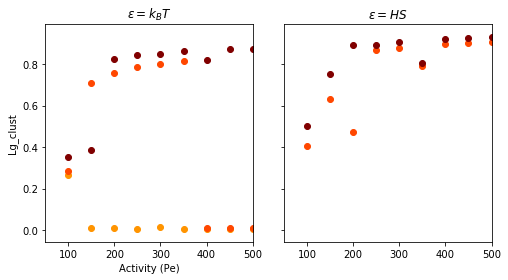

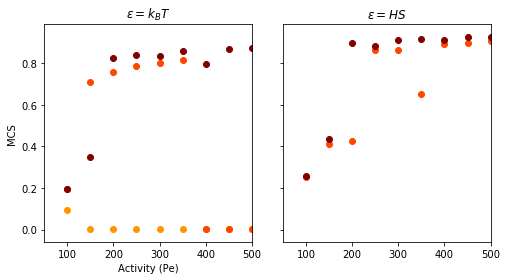

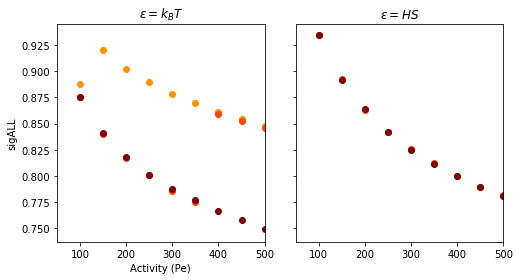

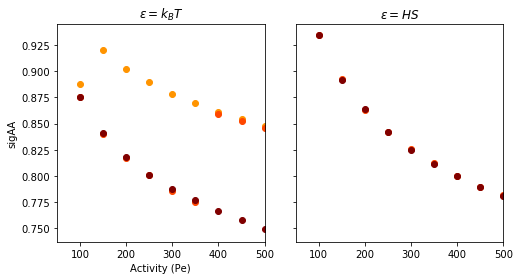

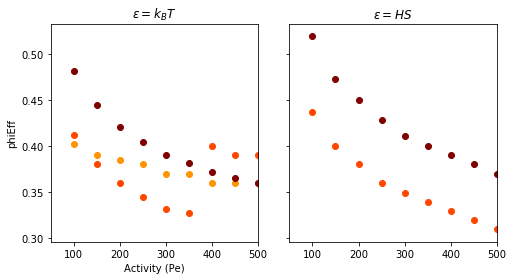

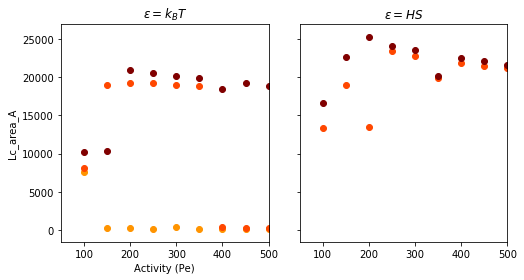

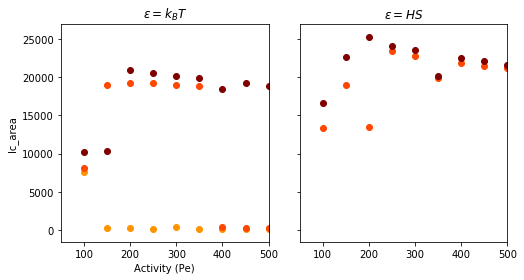

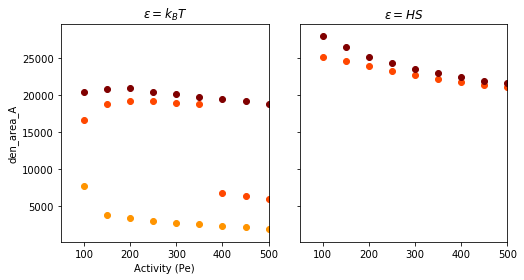

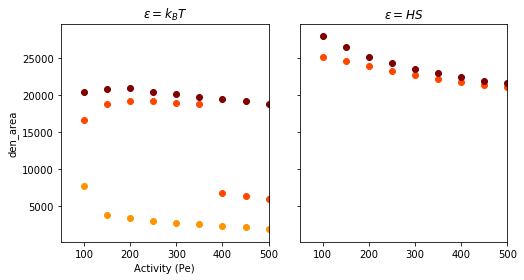

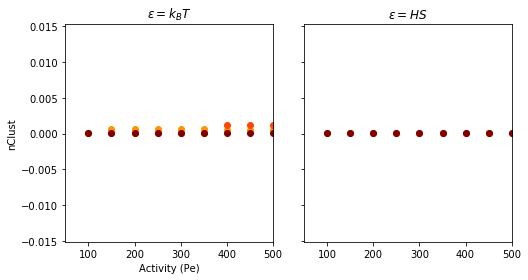

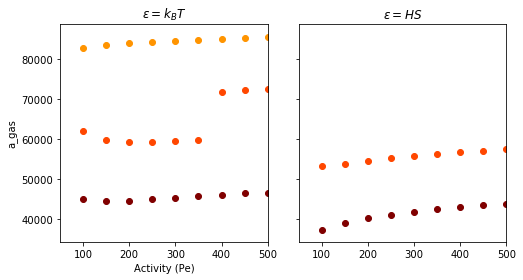

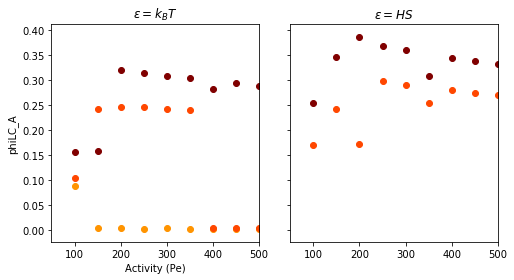

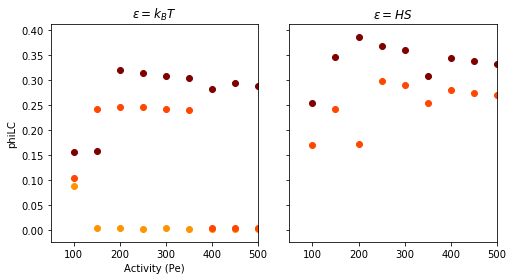

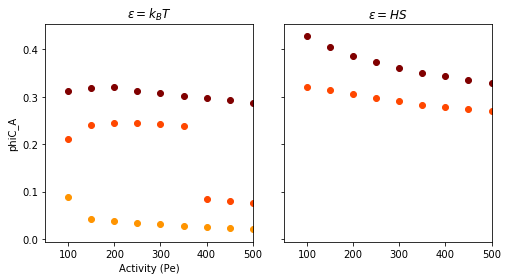

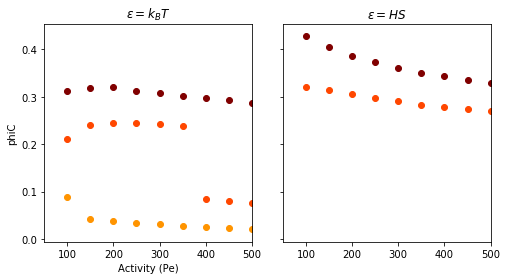

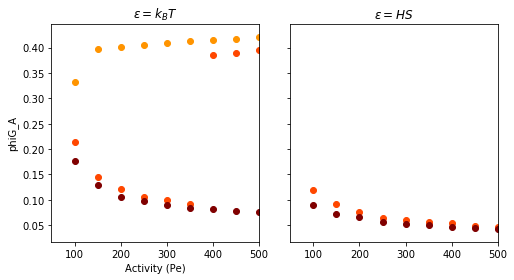

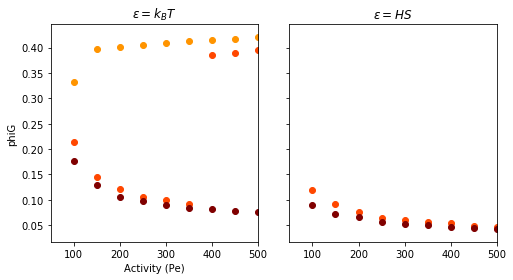

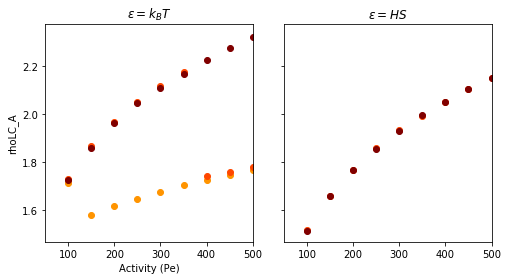

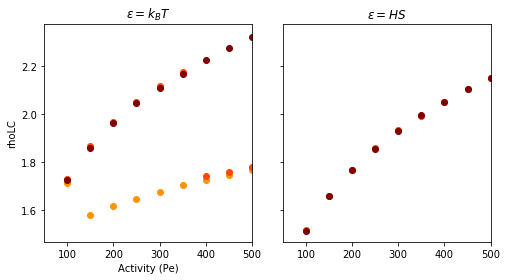

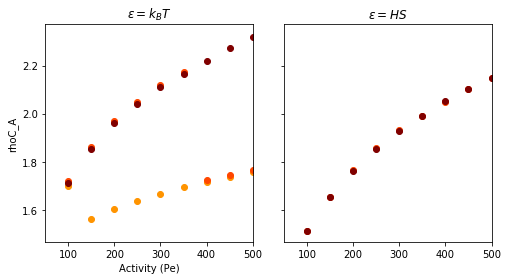

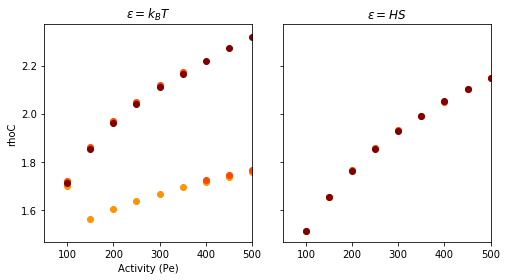

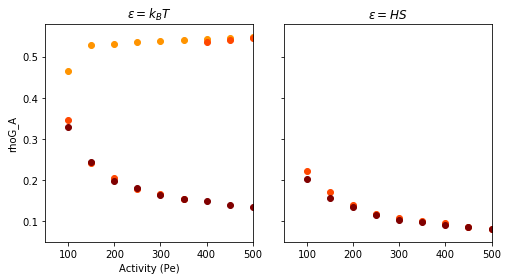

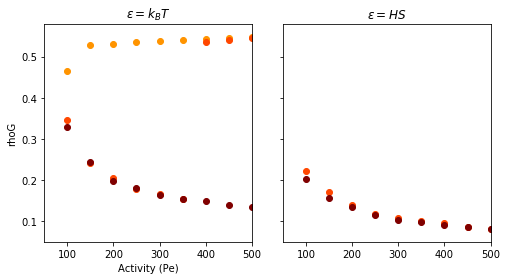

In [21]:
# Now plot the steady-state data vs input parameters
headers = list(ssAvg)
for z in headers:
    if np.any(ssAvg[z]):
        fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
        for i in xrange(len(all_data)):
            if params['pe'][i] != 50:
                if params['eps'][i] == 1:
                    ax[0].scatter(params['pe'][i], ssAvg[z][i], c=plt.cm.jet(params['phi'][i] / 60.))
                else:
                    ax[1].scatter(params['pe'][i], ssAvg[z][i], c=plt.cm.jet(params['phi'][i] / 60.))
        ax[0].set_xlabel(r'Activity (Pe)')
        ax[0].set_ylabel(z)
        ax[0].set_title(r'$\epsilon=k_{B}T$')
        ax[1].set_title(r'$\epsilon=HS$')
        ax[0].set_xlim(50, 500)
        ax[1].set_xlim(50, 500)
        plt.subplots_adjust(wspace=0.15)
        plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


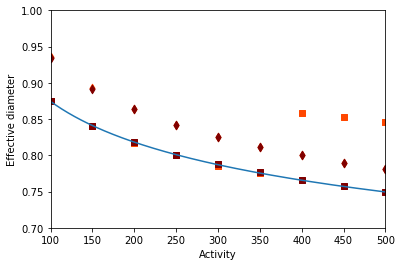

In [33]:
def powerLaw(x, m, b):
    return (x**m)*np.exp(b)
xs = np.arange(0.0, 500.0, 0.0001)
outM = -0.0957707250171
outB = 0.306774161185
plt.plot(xs, powerLaw(xs, outM, outB))

headers = list(ssAvg)
for z in headers:
    if z == 'sigALL':
        if np.any(ssAvg[z]):
            for i in xrange(len(all_data)):
                if params['pe'][i] != 50 and params['phi'][i] != 45:
                    if params['eps'][i] == 1:
                        plt.scatter(params['pe'][i], ssAvg[z][i], c=plt.cm.jet(params['phi'][i] / 60.), marker='s')
                    else:
                        plt.scatter(params['pe'][i], ssAvg[z][i], c=plt.cm.jet(params['phi'][i] / 60.), marker='d')
            plt.xlabel('Activity')
            plt.ylabel('Effective diameter')
            plt.xlim(100, 500)
            plt.ylim(0.7, 1)
            plt.show()

In [ ]:
# We are feeding in the correct diameter... need to adjust extent of repulsion!